## Introduction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

## Variables
id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

It's a great dataset for evaluating simple regression models.
it contains 21613 rows × 21 columns

## Importing Relevant libraries
importing pandas for data manipulation and analysis, matplotlib to visualize data in charts adn graphs and seaborn for better visualization,


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



## Importing Dataset

In [2]:
raw_data = pd.read_csv('kc_house_data.csv')
raw_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Cleaning data
using .describe(include=all) to explore variables/features and spotcheck for problems. "Include = all", populates Categorical and Numerical variables. The first value observered is count, Count is the number of obersavations for each variable, all counts
being the same number of 21613 signifies the data has no missing values. We also take into account how much unique 
values the catetgorical varibles have through the unique value. Top shows the most common value with frequencey below. Mean,Min and Max, inconsistency usually signify signs of outliers.

In [3]:
raw_data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [4]:
raw_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


isnull().sum() is also used to check for missing values in the dataset

In [5]:
raw_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

To Check for duplicate values in the dataset I use .duplicated() function

In [6]:
raw_data.duplicated().sum()

0

In [7]:
data_cleaned = raw_data

## Feature Selection
Using a Correlation Matrix to plot Correlation between all of the numerical variable features. This is a good way to see if you can discover other correlation between other features. i use seaborn to create a heatmap and matplotlib to plot bigger figure,padding of the numbers inside the cells and visualize the heatmap. Heatmap is a great way to physically see high and low correlation with colors as well as trends. The darker the shade of blue the higher the correlation.I then use the .corr() function to find the correletion in the data set with annot=true to pass the correlated values into the heatmap cells.


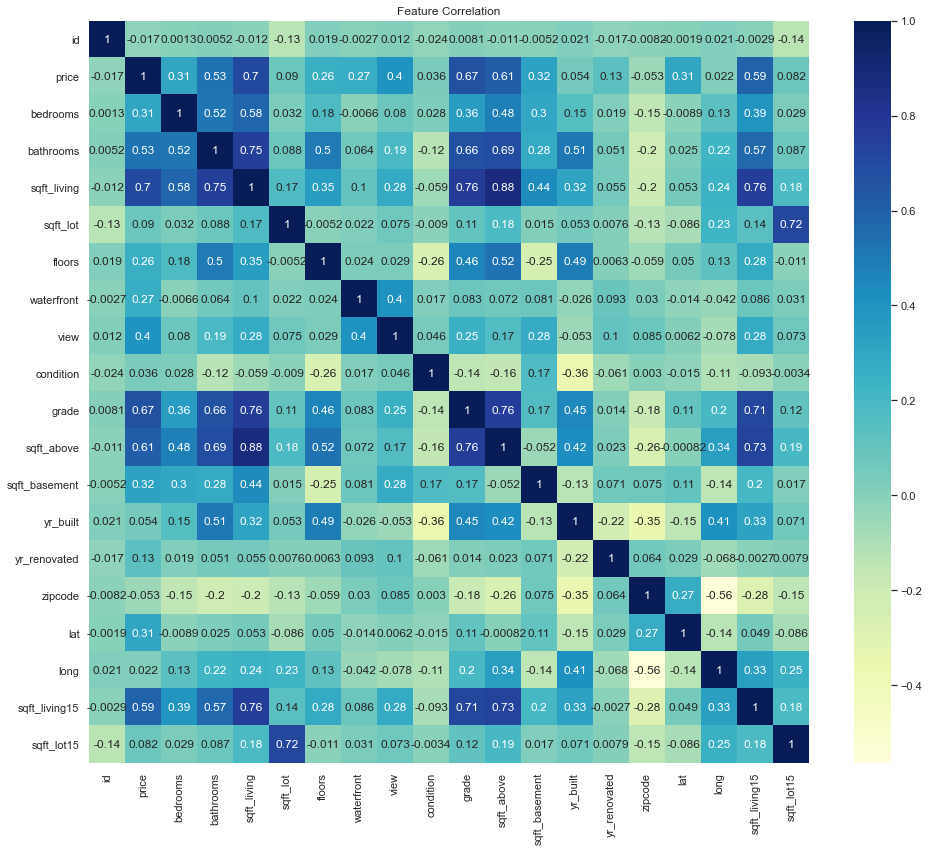

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="YlGnBu")
plt.title('Feature Correlation')
plt.tight_layout()
plt.show()

Grade seemed to have a great number of highly correlating features. I grabbed every feature above .65 correlation and made a seperate dataframe containing those features.

In [9]:
data_feat = data_cleaned[['grade','price','bathrooms','sqft_above']]

## Declaring depedent and indepedent Variable
Declaring indepedent and depedent variable, for indepdent(x) grade was droped since its the depedent variable.

In [10]:
x = data_feat.drop(['grade'],axis=1)

In [11]:
y = data_feat['grade']

In [12]:
x

,price,bathrooms,sqft_above
0,221900.0,1.00,1180
1,538000.0,2.25,2170
2,180000.0,1.00,770
3,604000.0,3.00,1050
4,510000.0,2.00,1680
...,...,...,...
21608,360000.0,2.50,1530
21609,400000.0,2.50,2310
21610,402101.0,0.75,1020
21611,400000.0,2.50,1600


## Scaling data
Importing and using the standard scaler function from sklearn to scale the indepedent variables , so that all the features hold a standard weight towards the depedent variable.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [14]:
x_scaled = scaler.transform(x)

In [15]:
x_scaled

array([[-0.86671733, -1.44746357, -0.73470764],
       [-0.00568792,  0.1756067 ,  0.46084084],
       [-0.98084935, -1.44746357, -1.22983377],
       ...,
       [-0.37586519, -1.77207762, -0.92792759],
       [-0.38158814,  0.50022075, -0.22750526],
       [-0.58588173, -1.77207762, -0.92792759]])

 ## Train_Test_Split data 
Setting a 80/20 split, splitting the training data into 80 and the test data to 20 with a random state of 9

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size= 0.20,random_state=9)

## Fitting model
Fitting the Linear regression module with the outputed trained data x_train and y_train data.

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
reg.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## Predictions
calling the predict function on the regression using the x_test data and storing it in the y_pred Variable

In [19]:
y_pred = reg.predict(x_test)
y_pred

array([ 6.99067644,  7.41785887,  7.69727204, ..., 10.37341681,
        7.40145392,  6.85039211])

## R^2 score
I import the r_2 score function from sklearn module and run it against the y_test data and the y_pred varible to receive a r2 score of 67. The R2 score being 67% signifies the independent variables can explain 67% of the variations.

In [20]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)


0.6720697955949131

## Proving model efficency
I plot the y_test and y_pred in a scatter plot to compare the actual values and predicted values, I notice a sort of linear regression between the two. Enough to visualize the R2 score of 67%

Text(0.5, 1.0, 'Actual vs Predicted')

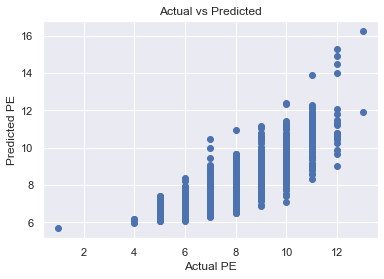

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual PE')
plt.ylabel('Predicted PE')
plt.title('Actual vs Predicted')


In this cell I create a new dataframe with Actual values, Predicted values and the difference to further visualize the worthness of the regression model

In [22]:
pred_y_data = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Differences':y_test - y_pred})
pred_y_data[0:30]

,Actual Value,Predicted Value,Differences
2463,7,6.990676,0.009324
13901,7,7.417859,-0.417859
14693,8,7.697272,0.302728
10530,8,7.100382,0.899618
18104,8,7.331789,0.668211
12891,8,7.704093,0.295907
8996,8,8.689345,-0.689345
14332,8,8.505506,-0.505506
477,7,6.786175,0.213825
17243,6,6.858932,-0.858932
